## Import modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

## Loading the dataset

In [4]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


## Preprocessing the dataset

In [6]:
# check null values
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [8]:
# convert object to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


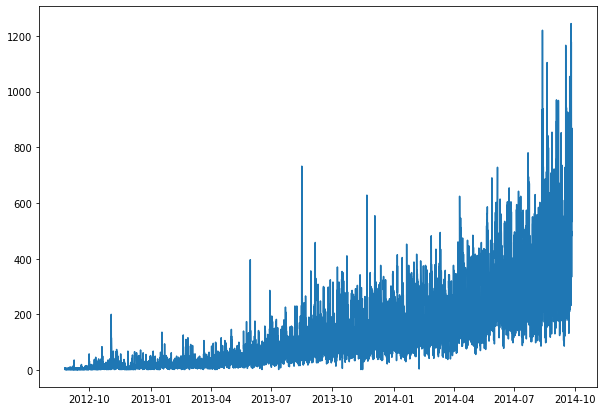

In [9]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'], df['Count'])
plt.show()

## Format data for the model

In [10]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [11]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


## Input Split

In [12]:
size = 60
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [13]:
train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


In [14]:
test.head()

,y,ds
Datetime,,
2014-07-28,8546,2014-07-28
2014-07-29,8218,2014-07-29
2014-07-30,8498,2014-07-30
2014-07-31,8740,2014-07-31
2014-08-01,9186,2014-08-01


In [15]:
test.tail()

,y,ds
Datetime,,
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23
2014-09-24,16856,2014-09-24
2014-09-25,14152,2014-09-25


## Model Training

In [16]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.41101
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      36       1576.94   0.000270368       77.9788   4.055e-06       0.001       91  LS failed, Hessian reset 
      77       1578.55   0.000977926       97.5546   1.478e-05       0.001      179  LS failed, Hessian reset 
      99       1578.59   3.14269e-06       66.1685      0.4756      0.4756      214   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       1578.59   4.99879e-08       62.2954      0.3241           1      246   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [17]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [18]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-481.270136,-1850.128634,186.133947,-481.270136,-481.270136,-342.816560,-342.816560,-342.816560,-846.110497,-846.110497,-846.110497,503.293936,503.293936,503.293936,0.0,0.0,0.0,-824.086696
1,2012-08-26,-474.239946,-1939.320226,29.194259,-474.239946,-474.239946,-458.402258,-458.402258,-458.402258,-967.068164,-967.068164,-967.068164,508.665905,508.665905,508.665905,0.0,0.0,0.0,-932.642205
2,2012-08-27,-467.209757,-453.183612,1451.623909,-467.209757,-467.209757,943.704113,943.704113,943.704113,431.162306,431.162306,431.162306,512.541807,512.541807,512.541807,0.0,0.0,0.0,476.494356
3,2012-08-28,-460.179567,-502.230347,1495.778317,-460.179567,-460.179567,954.559812,954.559812,954.559812,439.527601,439.527601,439.527601,515.032211,515.032211,515.032211,0.0,0.0,0.0,494.380245
4,2012-08-29,-453.149378,-501.902523,1441.295797,-453.149378,-453.149378,915.980595,915.980595,915.980595,399.725780,399.725780,399.725780,516.254816,516.254816,516.254816,0.0,0.0,0.0,462.831218


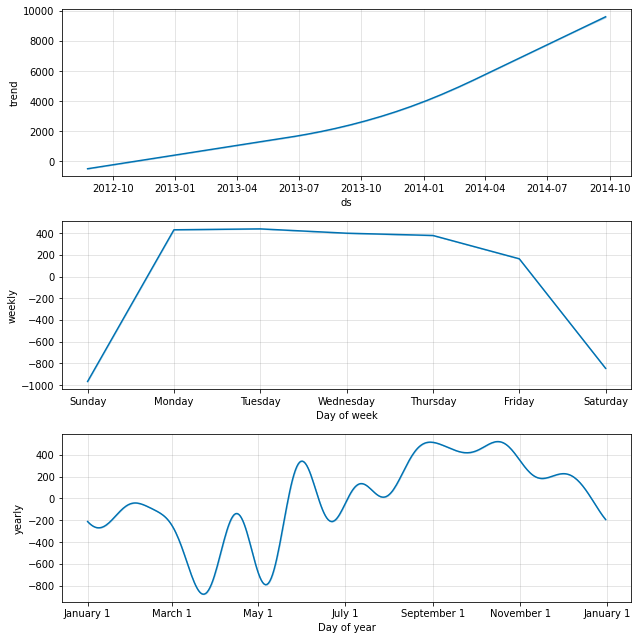

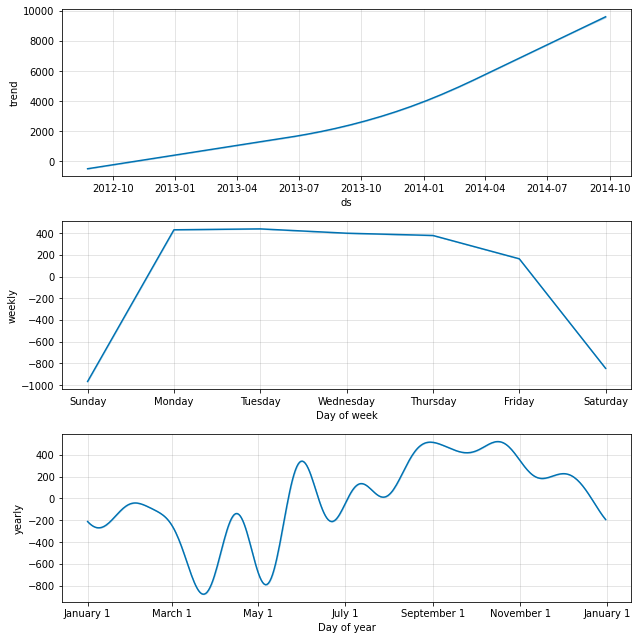

In [19]:
model.plot_components(forecast)

In [20]:
pred = forecast.iloc[-60:, :]
len(pred)

60

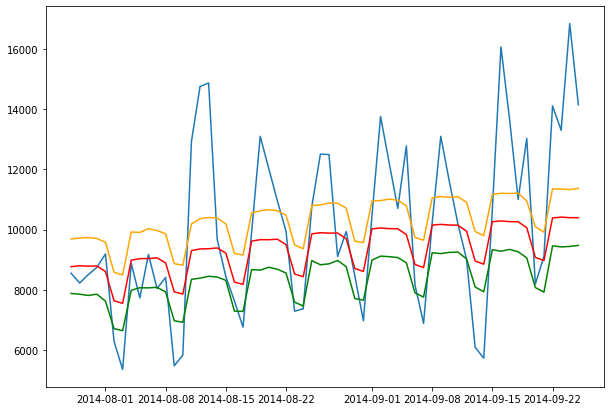

In [21]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

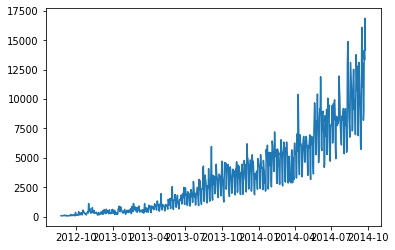

In [22]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

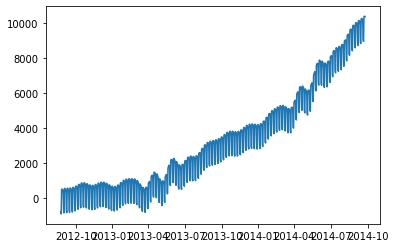

In [23]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [24]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -26.2489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1808.99    0.00716023       237.293           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       1811.14     0.0002344       96.1682   1.757e-06       0.001      258  LS failed, Hessian reset 
     199       1811.37   0.000476894       77.0337      0.2917           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       1811.39    0.00011688       83.6985   1.756e-06       0.001      326  LS failed, Hessian reset 
     270       1811.47   3.51296e-07       55.1428           1           1      413   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-689.771811,-2305.177644,83.729141,-689.771811,-689.771811,-423.631125,-423.631125,-423.631125,-995.180599,-995.180599,-995.180599,571.549474,571.549474,571.549474,0.0,0.0,0.0,-1113.402936
1,2012-08-26,-681.652822,-2454.300287,-107.730222,-681.652822,-681.652822,-581.691440,-581.691440,-581.691440,-1144.259298,-1144.259298,-1144.259298,562.567859,562.567859,562.567859,0.0,0.0,0.0,-1263.344262
2,2012-08-27,-673.533834,-849.751472,1500.438706,-673.533834,-673.533834,1008.326608,1008.326608,1008.326608,457.605946,457.605946,457.605946,550.720663,550.720663,550.720663,0.0,0.0,0.0,334.792775
3,2012-08-28,-665.414845,-712.755581,1621.832721,-665.414845,-665.414845,1145.208324,1145.208324,1145.208324,608.389801,608.389801,608.389801,536.818522,536.818522,536.818522,0.0,0.0,0.0,479.793479
4,2012-08-29,-657.295857,-741.914189,1691.224480,-657.295857,-657.295857,1078.613810,1078.613810,1078.613810,556.922731,556.922731,556.922731,521.691079,521.691079,521.691079,0.0,0.0,0.0,421.317953


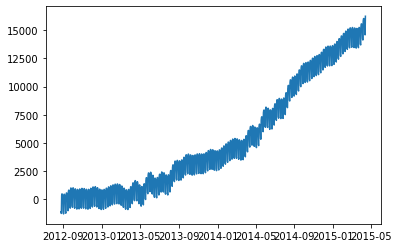

In [25]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()